# 1. Titanic data 탐색

### 1-1. data 파악

In [1]:
import pandas as pd
import os 
os.getcwd()  #os.getcwd() : 현재 디렉터리 위치보기
os.chdir('C://Users//김도영//GOMUL')   #os.chdir() : 디렉터리 위치 변경하기

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head(5)    # test 파일은 survived칼럼이 예측해야할 것이기 때문에 없음(종속변수)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape   # 행, 열

(891, 12)

In [5]:
test.shape   # train의 절반 정도의 데이터 // train보다 칼럼한개 없음(survived)

(418, 11)

In [6]:
train.info()   #age, cabin, embarked 같은 경우는 결측값(NaN)이 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()  # null값 몇개 있는지 파악

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

######    
### 1-2. 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  #setting seaborn default for plots (시본을 디폴트 값으로 설정)

In [10]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()  #feature에 따라 생존한 사람(value)카운트
    dead = train[train['Survived']==0][feature].value_counts()  #feature에 따라 죽은 사람(value)카운트
    df = pd.DataFrame([survived, dead])  #survived, dead 합친 데이터 프레임 만들기
    df.index = ['Survived', ' Dead']   #인덱스 달아주기
    df.plot(kind='bar', stacked=True, figsize=(10,5))  #차트 그리기 // stacked 디폴트값은 False

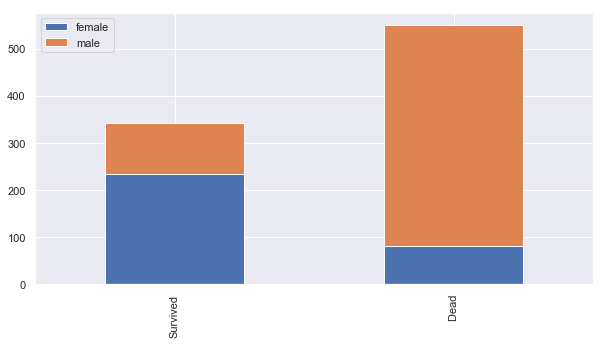

In [11]:
bar_chart('Sex')  #성별에 따라 살았는지, 죽었는지

여자가 많이 살아남고, 남자가 많이 죽었음을 알 수 있음.

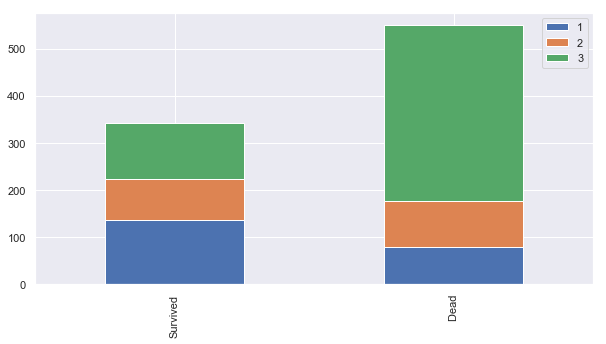

In [12]:
bar_chart('Pclass')   #클래스에 따라 살았는지, 죽었는지

3등석(값이 저렴한 좌석)일수록 많이 죽음

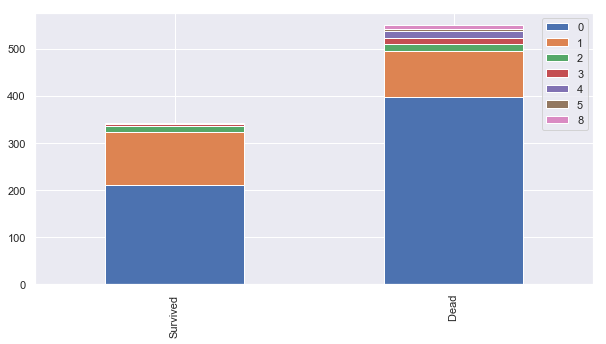

In [13]:
bar_chart('SibSp')  #가족수에 따라 살았는지, 죽었는지

(애매하지만) 혼자 탄 경우 조금 더 많이 죽음

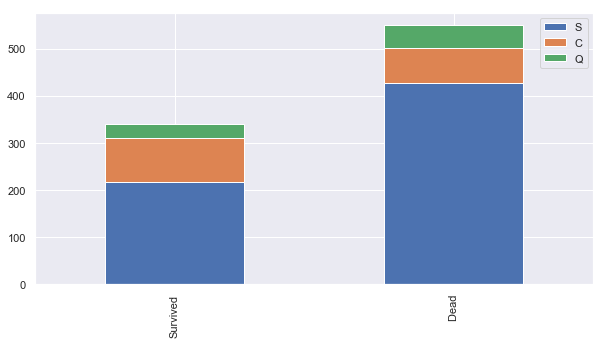

In [14]:
bar_chart('Embarked')   #승선한 선착장에 따라 살았는지, 죽었는지

(애매하긴 하지만) S에서 탔을 경우 더 많이 죽을 가능성 있음

#    

#    

# 2. 데이터 전처리

In [15]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 일반적으로 머신러닝 알고리즘은 text를 잘 읽지 못함. 
    -> text를 숫자로 바꿔주는 과정 진행 (one hot encoding 등)
2. NaN(null값)을 채워줄 방법이 필요함. 
    -> 평균값으로 대체하거나 null값을 가지고 있는 row를 drop하는 등 다양한 방법으로 처리

### 2-1. Name

이름탭에서 이름 자체는 큰 영향이 없다. 하지만 Mr, Mrs, Miss 등 성별, 결혼 유무를 알 수 있는 타이틀은 중요한 정보가 될것임 -> 해당 타이틀을 추출 한 후 이름 칼럼을 삭제

In [16]:
#train과 test 데이터를 합침
train_test_data = [train, test]

In [17]:
train_test_data    #train(891 rows) + test(418 rows)

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

##### (1) Title 추출

In [18]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

위 코드는 정규 표현식을 사용해 Mr. Mrs. 등의 Title을 추출하고 있음

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Capt          1
Jonkheer      1
Sir           1
Ms            1
Don           1
Countess      1
Lady          1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

##### (2) Title을 숫자로 바꾸기

Mr = 0 / Miss = 1 / Mrs = 2 / Others = 3

In [21]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Dona":3, "Dr":3,
                 "Mlle":3, "Capt":3, "Don":3, "Lady":3, "Jonkheer":3, "Ms":3, "Mme":3, "Sir":3, "Countess":3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


##### (3) Name 칼럼 삭제

In [24]:
train.drop('Name', axis=1, inplace= True)    #axis=1 은 '열'데이터를 지우겠다는 뜻
test.drop('Name', axis=1, inplace= True)     #inplace는 drop한 것을 기존데이터프레임을 대체하는 것을 뜻함

In [25]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


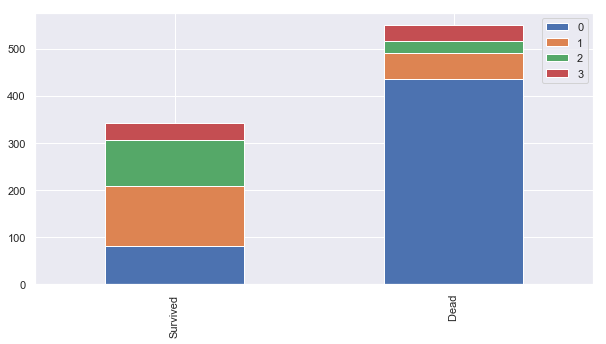

In [26]:
bar_chart('Title')

######    
### 2-2. Sex

In [27]:
sex_mapping = {"male":0, "female":1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

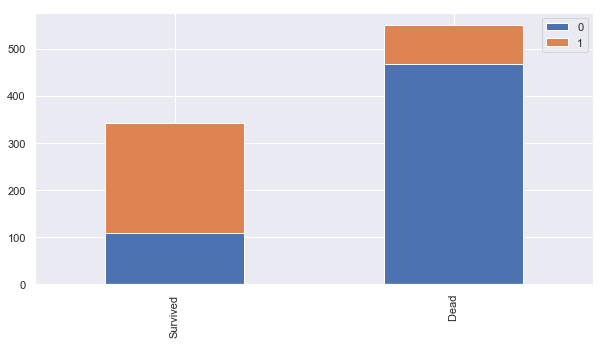

In [28]:
bar_chart('Sex')

######    
### 2-3. Age_null

Age 칼럼은 NaN 값을 채워야함 

Title을 바탕으로 '0'(남자)은 '0' 나이의 평균 등 group을 지어 group에 속하는 평균을 NaN값에 넣음

In [29]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
#null을 채울 값은 train.groupby('Title')한거에서 ['Age']의 median값
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

######    
### 2-4. Age_scale

Age의 scale이 넓기 때문에 조절필요

(정교화 방법 사용 할 수 도 있음)

10대, 20대, 30대 등 구간을 정하고 그 구간별로 그룹화 함

In [32]:
#특정 칼럼에 특정 값 입력하기 -> loc사용
# child(~16) : 0
# young(17~26) : 1
# adult(27~36) : 2
# mid(37~62) : 3
# senior(63~) : 4
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age'] = 1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age'] = 2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age'] = 3,
    dataset.loc[dataset['Age']>62, 'Age'] = 4

In [33]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


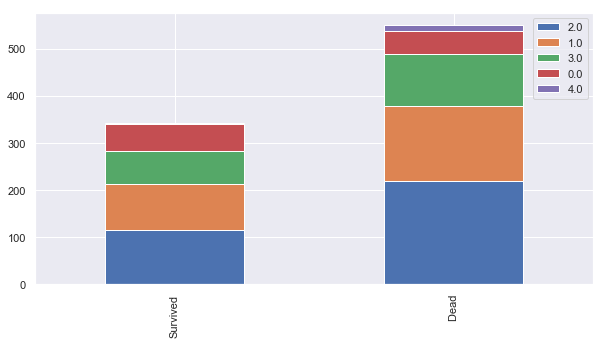

In [34]:
bar_chart('Age')

######    
### 2-5. Embarked

Embarked : 탑승한 선착장에 관한 정보

고소득 거주자 지역에서 탑승 -> 1등석일 확률이 높음 -> 생존할 확률이 높아짐

반대라면 낮아질 가능성이 있기 떄문에 어느정도 유의미한 변수라고 할 수 있음

In [35]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()   # embarked칼럼에서1등급인 데이터 count
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [36]:
Pclass1

S    127
C     85
Q      2
Name: Embarked, dtype: int64

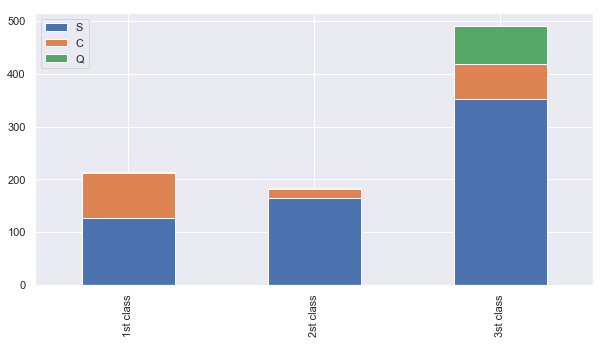

In [37]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2st class', '3st class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

-> Q지역은 못사는 곳 같음 (그외에는 파악하기 힘듦)

-> 탑승객 중 S의 비율이 압도적으로 높아 Embarked가 NaN이면 S라고 해도 무방하다는 가정을 할 수 있음

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [39]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    #dataset['Embarked'].fillna('S', inplace=True)

In [40]:
train.isnull().sum()   #Embarked의 null값 사라짐

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [41]:
embarked_mapping = {"S":0, "C":1, "Q":2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [42]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


######    
### 2-6. Fare

In [43]:
# fare 의 nan값은 같은 pclass의 median 값으로 넣음
train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [44]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [45]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare']=0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare']=2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3

In [46]:
train['Fare'].describe()

count    891.000000
mean       0.765432
std        0.971490
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        3.000000
Name: Fare, dtype: float64

In [47]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


######    
### 2-7. Cabin

In [48]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F2                 3
C22 C26            3
F33                3
E101               3
D                  3
C52                2
B18                2
E33                2
D17                2
D26                2
B28                2
C124               2
E44                2
F G73              2
C123               2
D33                2
B49                2
B22                2
D36                2
E24                2
E67                2
B20                2
C92                2
C65                2
F4                 2
D35                2
B57 B59 B63 B66    2
                  ..
B39                1
C103               1
B38                1
C49                1
T                  1
B4                 1
D9                 1
D7                 1
C95                1
C85                1
B102               1
E58                1
C118               1
E38                1
E40                1
B37                1
C106         

cabin의 앞의 알파벳만 따와보기

In [49]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

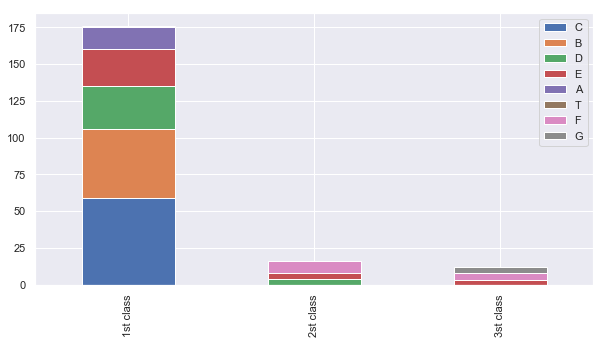

In [50]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2st class','3st class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

-> 1등석에는 ABCDE로 시작하는 cabin이 많지만 2,3등석은 (D제외) 아예 없음

In [51]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [52]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform("median"), inplace=True)

######    
### 2-8. Familysize

가족 수를 합침

FamilySize = sib(형제자매) + parch(부모자식)

In [53]:
train["FamilySize"] = train['SibSp'] + train['Parch'] + 1    # 1을 더하는 이유는 '나'도 포함하기 위해
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [54]:
train['FamilySize'].max()

11

In [55]:
test['FamilySize'].max()

11

In [56]:
# FamilySize 범위는 1~11
#정규화
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [57]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


######    
### 2-9. Others 

#### (1) 필요없는 칼럼 drop

티켓번호, 형제자매수, 부모가족수 칼럼 drop

In [58]:
features_drop = ['Ticket', 'SibSp','Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train에서 PassengerId(인덱스) 필요없으므로 drop

In [59]:
train = train.drop(['PassengerId'], axis=1)

In [60]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


#### (2) train 에서 survived를 target값으로 만듦

In [61]:
#train -> 학습시킬 데이터 train_data
train_data = train.drop('Survived', axis=1)
#train -> 결과를 확인할 데이터 target
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

#    

#    

# 3. Modeling

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


######    
### 3-1. Cross validation(K-fold) 교차검증 진행 

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)  #10개의 fold로 나눔

######    
#### 3-1-1. kNN

In [65]:
clf = KNeighborsClassifier(n_neighbors=13)    #13개의 이웃
scoring = 'accuracy'
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)  #교차검증10개 폴더로 해서 값이 10개 나옴

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


cross_val_score : 교차검증 함수

(모델명, 훈련데이터, 타깃, cv(폴드 수), n_jobs(사용할cpu코어 갯수), scoring(평가지표지정) )   

#cv 디폴트값은 3 

#n_jobs=-1 이면 가능한 모든 코어를 사용함


In [66]:
#kNN Score
round(np.mean(score)*100, 2)

82.6

######    
#### 3-1-2. Decision Tree

In [67]:
clf = DecisionTreeClassifier()
clf   # 특별한 매개변수 안건들이면 모두 디폴트 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
scoring='accuracy'
socre = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(clf)
print(score)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [69]:
#decision tree score
round(np.mean(score)*100, 2)

82.6

######    
#### 3-1-3. Random Forest

In [70]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
socre = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [71]:
#decision tree score
round(np.mean(score)*100, 2)

82.6

######    
#### 3-1-4. Naive Bayes

In [72]:
clf = GaussianNB()
socring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [73]:
#Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

######    
#### 3-1-5. SVM

In [74]:
clf = SVC(C=1, kernel='rbf', coef0=1)
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(socre)

[0.75555556 0.79775281 0.80898876 0.79775281 0.85393258 0.80898876
 0.82022472 0.80898876 0.75280899 0.79775281]


SVC

(C(여유변수), kernel(커털

In [75]:
round(np.mean(score)*100, 2)

83.5

#    

#    

# 4. Testing

In [76]:
#SVM이 제일 정확도가 높으므로 SVM 사용

clf = SVC(C=1, kernel='rbf', coef0=1)
clf.fit(train_data, target)

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)  #예측 진행, 결과물을 prediction에 저장

In [78]:
import collections, numpy

collections.Counter(prediction)   #사망 257명, 생존 161명

Counter({0: 257, 1: 161})

#    

#    

# 5. Upload

In [79]:
#캐글 제출할 CSV파일 저장
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv('submission.csv', index=False)

In [80]:
submission = pd.read_csv("submission.csv")
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
